# 2 EDA and exploratory Linear Regression

In [1]:
#from bs4 import BeautifulSoup
#import requests
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
#from IPython.core.display import display, HTML
import pickle
import copy


## Retrieve scraped data via pickle

In [2]:
#director = 'godard'
director = 'hitchcock'
#director = 'bergman'
#director = 'fassbinder'
#director = 'herzog'
#director = 'allen'
#director='scorsese'

In [3]:

dir_str = director + '/'

pickled_film_catalog_filename = 'film_catalog_' + director +'.pickle'
pickled_box_office_filename = 'box_office_' + director +'.pickle'
pickled_fc_columns_filename = 'fc_cols_' + director +'.pickle'
pickled_dict_of_actors_filename = 'dict_of_actors_' + director +'.pickle'

#pickled_misc_vars_filename = 'misc_vars_' + director +'.pickle'

In [4]:
with open(dir_str + pickled_film_catalog_filename, 'rb') as read_file:
    film_catalog_cast_columns_reordered = pickle.load(read_file)

In [5]:
with open(dir_str + pickled_box_office_filename, 'rb') as read_file:
    box_office_df = pickle.load(read_file)

In [6]:
with open(dir_str + pickled_fc_columns_filename, 'rb') as read_file:
    film_catalog_columns = pickle.load(read_file)


In [7]:
with open(dir_str + pickled_dict_of_actors_filename, 'rb') as read_file:
    dict_of_all_actors  = pickle.load(read_file) 

In [8]:
first_cast_column = len(film_catalog_columns) - len(dict_of_all_actors)

### Merging, cleaning, wrangling

In [9]:
if(director != 'fassbinder'):
    films_df = pd.merge(film_catalog_cast_columns_reordered, box_office_df, how='outer', left_on='title', right_on='title')
else:
    films_df = film_catalog_cast_columns_reordered
    films_df['worldwide_gross_bo'] = np.nan

In [10]:
films_df.head(10)

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross_imdb,runtime,budget,...,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando,worldwide_gross_bo
0,Spot of the 22nd Ji.hlava IDFF,2018.0,7.2,20.0,1.0,,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,6.2,2314.0,84.0,25 January 2019 (USA),76.0,132015.0,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bande-annonce de 'Le livre d'image',2018.0,7.2,23.0,2.0,27 April 2018 (France),NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,5.9,80.0,5.0,13 March 2015 (Switzerland),NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,5.8,319.0,114.0,16 July 2014 (France),NaN,NaN,114.0,2100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Goodbye to Language,2014.0,5.9,5487.0,70.0,28 May 2014 (France),75.0,566423.0,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Khan Khanne,2014.0,7.0,84.0,9.0,May 2014 (France),NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3x3D,2013.0,5.8,313.0,70.0,30 April 2014 (France),NaN,NaN,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Film socialisme,2010.0,5.7,2539.0,102.0,19 May 2010 (France),64.0,222079.0,102.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tribute to Éric Rohmer,2010.0,6.4,110.0,3.0,8 February 2010 (France),NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
films_df.columns[:]


Index(['title', 'year', 'rating', 'rating_count', 'duration', 'release_date',
       'metacritic_score', 'worldwide_gross_imdb', 'runtime', 'budget',
       ...
       'Anton Mossine', 'Heinz Przbylski', 'Kerstin Boos', 'H.J. Jurgen',
       'Uwe Grzechowski', 'Jochen Gliscinsky', 'Iva Svarcová', 'Elfi Gäbel',
       'Carmen Mirando', 'worldwide_gross_bo'],
      dtype='object', length=745)

In [12]:
films_df.head()

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross_imdb,runtime,budget,...,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando,worldwide_gross_bo
0,Spot of the 22nd Ji.hlava IDFF,2018.0,7.2,20.0,1.0,,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,6.2,2314.0,84.0,25 January 2019 (USA),76.0,132015.0,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bande-annonce de 'Le livre d'image',2018.0,7.2,23.0,2.0,27 April 2018 (France),NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,5.9,80.0,5.0,13 March 2015 (Switzerland),NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,5.8,319.0,114.0,16 July 2014 (France),NaN,NaN,114.0,2100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# these renamings are temporary
if('box_office' in films_df.columns):
    films_df.rename(columns={'box_office':'worldwide_gross_bo'}, inplace=True)
    films_df

In [14]:
# these renamings are temporary
if('worldwide_gross' in films_df.columns):
    films_df.rename(columns={'worldwide_gross':'worldwide_gross_imdb'}, inplace=True)

In [15]:
main_column_names_rearranged = ['title', 'year', 'release_date', 'duration', 'runtime', 'budget', 'worldwide_gross_imdb', 'worldwide_gross_bo', 'rating', 'metacritic_score', 'rating_count', 'tv_series', 'documentary','cinematographer']
cast_column_names= films_df.columns[first_cast_column:-1]

In [16]:
films_df.columns[:15]

Index(['title', 'year', 'rating', 'rating_count', 'duration', 'release_date',
       'metacritic_score', 'worldwide_gross_imdb', 'runtime', 'budget',
       'tv_series', 'documentary', 'cinematographer', 'Jean-Luc Godard',
       'Anna Karina'],
      dtype='object')

In [17]:
#import copy


films_df_reordered=copy.deepcopy(films_df[[*main_column_names_rearranged, *cast_column_names] ] )                         
                            

In [18]:
films_df_reordered.head(10)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Kim Kashkashian,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,NaN,6.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,5.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Goodbye to Language,2014.0,28 May 2014 (France),70.0,70.0,NaN,566423.0,NaN,5.9,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Khan Khanne,2014.0,May 2014 (France),9.0,9.0,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3x3D,2013.0,30 April 2014 (France),70.0,70.0,NaN,NaN,NaN,5.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Film socialisme,2010.0,19 May 2010 (France),102.0,102.0,NaN,222079.0,NaN,5.7,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tribute to Éric Rohmer,2010.0,8 February 2010 (France),3.0,3.0,NaN,NaN,NaN,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
films_df_reordered.shape

(142, 745)

#### Clean up the `year` column

In [20]:
films_df_reordered['release_date'].fillna('', inplace=True)

In [21]:
films_df_reordered

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Kim Kashkashian,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,NaN,6.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,5.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,PrÃ©nom Carmen,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,DÃ©tectÃ­ve,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,Bande Ã part,NaN,,NaN,NaN,NaN,NaN,222271.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Le MÃ©pris,NaN,,NaN,NaN,NaN,NaN,544591.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
flix_to_clean_yr = (np.isnan(films_df_reordered['year'])) & (films_df_reordered['release_date']!='') & (films_df_reordered['release_date']!= 'NaN')

In [23]:
#films_df_reordered.loc[films_df_reordered[flix_to_clean_yr ], 'years'] = films_df_reordered.loc[films_df_reordered[flix_to_clean_yr ], 'years']

In [24]:
# use the release_date column where possible to set missing values in the year column
#films_df_reordered['year']=films_df_reordered.apply(lambda row: float((re.search(r'\d{4}', row['release_date'])).group()) if (np.isnan(row['year']) & (row['release_date']!='') & (row['release_date']!='NaN') ) else row['year'], axis=1)

cleaned_yrs = films_df_reordered.apply(lambda row: float((re.search(r'\d{4}', row['release_date'])).group()) if (np.isnan(row['year']) & (row['release_date']!='') & (row['release_date']!='NaN') ) else row['year'], axis=1)
films_df_reordered.loc[:, 'year'] = cleaned_yrs


In [25]:
films_df_reordered.tail(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Kim Kashkashian,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando
92,Un film comme les autres,1968.0,29 December 1968 (USA),100.0,120.0,NaN,NaN,NaN,5.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Sympathy for the Devil,1968.0,22 April 1969 (USA),100.0,100.0,NaN,NaN,NaN,6.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Bande-annonce de 'Mouchette',1967.0,,2.0,2.0,NaN,NaN,NaN,6.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Bande-annonce De 'Week End',1967.0,,3.0,3.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Weekend,1967.0,27 September 1968 (USA),105.0,105.0,250000.0,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Far from Vietnam,1967.0,6 June 1968 (USA),NaN,115.0,NaN,8132.0,NaN,7.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,La Chinoise,1967.0,4 March 1968 (USA),95.0,95.0,NaN,36488.0,NaN,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,The Oldest Profession,1967.0,8 November 1968 (USA),119.0,119.0,NaN,NaN,NaN,5.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2 or 3 Things I Know About Her,1967.0,17 March 1967 (France),87.0,87.0,NaN,104038.0,NaN,6.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Bande-annonce De 'Made in U.S.A.',1966.0,,2.0,2.0,NaN,NaN,NaN,6.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean up the `duration` column

In [26]:
films_df_reordered['duration']=films_df_reordered.apply(lambda row: row['runtime'] if (np.isnan(row['duration']) ) else row['duration'], axis=1)

#### Clean up the `bo_worldwide_gross` column

In [27]:
films_df_reordered['worldwide_gross'] = films_df_reordered.apply(lambda row: float(row['worldwide_gross_bo']) if (pd.notna(row['worldwide_gross_bo'])) & (row['worldwide_gross_bo']!='' ) else row['worldwide_gross_imdb'], axis=1)

In [28]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando,worldwide_gross
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,NaN,6.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132015.0
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,5.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Goodbye to Language,2014.0,28 May 2014 (France),70.0,70.0,NaN,566423.0,NaN,5.9,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566423.0
6,Khan Khanne,2014.0,May 2014 (France),9.0,9.0,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3x3D,2013.0,30 April 2014 (France),70.0,70.0,NaN,NaN,NaN,5.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Film socialisme,2010.0,19 May 2010 (France),102.0,102.0,NaN,222079.0,NaN,5.7,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222079.0
9,Tribute to Éric Rohmer,2010.0,8 February 2010 (France),3.0,3.0,NaN,NaN,NaN,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
films_df_reordered.columns[350:710]

Index(['Charlie Watts', 'Eliane Giovagnoli', 'Enrico Maria Salerno',
       'Bernard Noël', 'Jean-François Chappey', 'Catherine-Isabelle Duport',
       'Evabritt Strandberg', 'Birger Malmsten', 'Graziella Galvani',
       'Jean-Pierre Andréani',
       ...
       'Brigitte Bastien', 'Henri Cartier-Bresson', 'Claude Cheysson',
       'Alex Descas', 'Harry Dean Stanton', 'Véronique Müller', 'Joe Sheridan',
       'Belkacem Tatem', 'Violaine Barret', 'Hubert Ravel'],
      dtype='object', length=360)

#### Remove rows with too many missing values

In [30]:
films_df_reordered.shape

(142, 746)

In [31]:

n=films_df_reordered.iloc[:, :first_cast_column].notna()
n.sum(axis=1).head(50)


0      9
1     11
2      9
3      9
4     10
5     11
6      9
7      9
8     11
9      9
10     9
11     9
12     9
13     9
14     9
15     9
16     9
17    11
18     8
19    10
20     9
21     8
22    11
23     9
24     9
25     9
26    10
27     9
28    10
29     7
30     9
31     7
32     9
33     9
34     9
35     9
36    10
37     9
38     9
39     9
40     8
41     7
42     9
43     8
44     9
45     9
46     9
47     9
48     9
49     9
dtype: int64

In [32]:
first_cast_column

13

In [33]:
thresh=.4
thresh*first_cast_column

5.2

In [34]:
films_df_reordered.loc[n.sum(axis=1) >= thresh*first_cast_column]

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando,worldwide_gross
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,NaN,6.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132015.0
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,5.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Charlotte et son Jules,1960.0,3 March 1961 (France),20.0,13.0,NaN,NaN,NaN,6.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Breathless,1960.0,7 February 1961 (USA),90.0,90.0,400000.0,380228.0,NaN,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380228.0
126,"Charlotte et Véronique, ou Tous les garçons s'...",1959.0,6 May 1959 (France),21.0,21.0,NaN,NaN,NaN,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Opération 'Béton',1958.0,2 July 1958 (France),20.0,20.0,NaN,NaN,NaN,5.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#films_df_reordered.iloc[70, :].head(30)

In [36]:
films_df_reordered.columns

Index(['title', 'year', 'release_date', 'duration', 'runtime', 'budget',
       'worldwide_gross_imdb', 'worldwide_gross_bo', 'rating',
       'metacritic_score',
       ...
       'Anton Mossine', 'Heinz Przbylski', 'Kerstin Boos', 'H.J. Jurgen',
       'Uwe Grzechowski', 'Jochen Gliscinsky', 'Iva Svarcová', 'Elfi Gäbel',
       'Carmen Mirando', 'worldwide_gross'],
      dtype='object', length=746)

In [37]:


films_df_reordered = films_df_reordered.loc[n.sum(axis=1) >= thresh*first_cast_column, :] 

In [38]:
films_df_reordered.shape

(128, 746)

#### Cleap up the ordering of columns

In [39]:
main_column_names_rearranged = ['title', 'year', 'release_date', 'duration', 'runtime', 'budget', 'worldwide_gross','worldwide_gross_imdb', 'worldwide_gross_bo', 'rating', 'metacritic_score', 'rating_count', 'tv_series', 'documentary','cinematographer']
cast_column_names= films_df.columns[first_cast_column:-1]

In [40]:
films_df_reordered=films_df_reordered[[*main_column_names_rearranged, *cast_column_names] ] 

In [41]:
films_df_reordered.columns[:20]

Index(['title', 'year', 'release_date', 'duration', 'runtime', 'budget',
       'worldwide_gross', 'worldwide_gross_imdb', 'worldwide_gross_bo',
       'rating', 'metacritic_score', 'rating_count', 'tv_series',
       'documentary', 'cinematographer', 'Jean-Luc Godard', 'Anna Karina',
       'Anne-Marie Miéville', 'Anne Wiazemsky', 'Jean-Pierre Léaud'],
      dtype='object')

In [42]:
films_df_reordered.columns[20:85]

Index(['László Szabó', 'Jean-Claude Brialy', 'Jean-Paul Belmondo',
       'André S. Labarthe', 'Juliet Berto', 'Michel Piccoli',
       'Isabelle Huppert', 'Jean-Pierre Gos', 'Nathalie Baye',
       'Myriem Roussel', 'Jean-Pierre Cassel', 'Georges Staquet',
       'Jacques Dutronc', 'Yves Afonso', 'Geneviève Pasquier',
       'Claude Brasseur', 'Cécile Reigher', 'Roland Blanche',
       'Blandine Jeanson', 'Ronald Chammah', 'Emmanuelle Seigner',
       'Eddie Constantine', 'Juliette Binoche', 'Odile Geoffroy',
       'Jack Palance', 'Woody Allen', 'Giorgia Moll', 'Fritz Lang',
       'Brigitte Bardot', 'Thierry Rode', 'Aude Amiot', 'Jacques Villeret',
       'Christophe Bourseiller', 'Pierre Oudrey', 'Michel Marot',
       'Marlène Jobert', 'Chantal Goya', 'Marianne Faithfull', 'Gilles Quéant',
       'Jane Fonda', 'Jean-Pierre Gorin', 'Sacha Briquet',
       'Bernard Eisenschitz', 'Laurence Côte', 'Roland Amstutz',
       'Christophe Odent', 'Yves Montand', 'Jerzy Radziwilowicz',
    

In [43]:
films_df_reordered.sort_values(by='title').tail(40)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Kim Kashkashian,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando
66,Passion,1982.0,26 May 1982 (France),88.0,88.0,NaN,NaN,NaN,NaN,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,"Passion, le travail et l'amour: introduction à...",1982.0,,39.0,39.0,NaN,NaN,NaN,NaN,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,"Petites notes à propos du film 'Je vous salue,...",1983.0,,25.0,25.0,NaN,NaN,NaN,NaN,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Pierrot le Fou,1965.0,8 January 1969 (USA),110.0,110.0,300000.0,134722.0,134722.0,NaN,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Plus Oh!,1996.0,1996 (France),4.0,4.0,NaN,NaN,NaN,NaN,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Pravda,1970.0,21 May 1970 (USA),58.0,58.0,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Prières pour Refusniks,2004.0,2004 (France),10.0,10.0,NaN,NaN,NaN,NaN,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Puissance de la parole,1988.0,,25.0,25.0,NaN,NaN,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Quelques remarques sur la réalisation et la pr...,1979.0,,20.0,20.0,NaN,NaN,NaN,NaN,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### In cast columns, replace NaN with zero

In [44]:
#first_cast_column = len(films_df_reordered.columns[15:])

In [45]:
#first_cast_column = len(films_df_reordered.columns) - len(dict_of_all_actors)

In [46]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Kim Kashkashian,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,NaN,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,132015.0,NaN,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,NaN,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,NaN,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Goodbye to Language,2014.0,28 May 2014 (France),70.0,70.0,NaN,566423.0,566423.0,NaN,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Khan Khanne,2014.0,May 2014 (France),9.0,9.0,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3x3D,2013.0,30 April 2014 (France),70.0,70.0,NaN,NaN,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Film socialisme,2010.0,19 May 2010 (France),102.0,102.0,NaN,222079.0,222079.0,NaN,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tribute to Éric Rohmer,2010.0,8 February 2010 (France),3.0,3.0,NaN,NaN,NaN,NaN,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
films_df_reordered.iloc[:, first_cast_column:]=films_df_reordered.iloc[:, first_cast_column:].replace(np.nan, 0)

In [48]:
films_df_reordered.iloc[:, first_cast_column:].sum()

documentary                                                         30.0
cinematographer        Fabrice AragnoJulian AtanassovFabrice AragnoJe...
Jean-Luc Godard                                                     38.0
Anna Karina                                                         11.0
Anne-Marie Miéville                                                 10.0
                                             ...                        
Uwe Grzechowski                                                      1.0
Jochen Gliscinsky                                                    1.0
Iva Svarcová                                                         1.0
Elfi Gäbel                                                           1.0
Carmen Mirando                                                       1.0
Length: 733, dtype: object

In [49]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Kim Kashkashian,Anton Mossine,Heinz Przbylski,Kerstin Boos,H.J. Jurgen,Uwe Grzechowski,Jochen Gliscinsky,Iva Svarcová,Elfi Gäbel,Carmen Mirando
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,NaN,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,132015.0,NaN,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,NaN,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,NaN,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,NaN,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Goodbye to Language,2014.0,28 May 2014 (France),70.0,70.0,NaN,566423.0,566423.0,NaN,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Khan Khanne,2014.0,May 2014 (France),9.0,9.0,NaN,NaN,NaN,NaN,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3x3D,2013.0,30 April 2014 (France),70.0,70.0,NaN,NaN,NaN,NaN,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Film socialisme,2010.0,19 May 2010 (France),102.0,102.0,NaN,222079.0,222079.0,NaN,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Tribute to Éric Rohmer,2010.0,8 February 2010 (France),3.0,3.0,NaN,NaN,NaN,NaN,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
films_df_reordered.dtypes[:15]

title                    object
year                    float64
release_date             object
duration                float64
runtime                 float64
budget                  float64
worldwide_gross         float64
worldwide_gross_imdb    float64
worldwide_gross_bo       object
rating                  float64
metacritic_score        float64
rating_count            float64
tv_series               float64
documentary             float64
cinematographer          object
dtype: object

In [51]:
films_df_reordered.iloc[:, :first_cast_column].head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series
0,Spot of the 22nd Ji.hlava IDFF,2018.0,,1.0,1.0,NaN,NaN,NaN,NaN,7.2,NaN,20.0,0.0
1,The Image Book,2018.0,25 January 2019 (USA),84.0,84.0,NaN,132015.0,132015.0,NaN,6.2,76.0,2314.0,0.0
2,Bande-annonce de 'Le livre d'image',2018.0,27 April 2018 (France),2.0,2.0,NaN,NaN,NaN,NaN,7.2,NaN,23.0,0.0
3,Remerciements de Jean-Luc Godard à son Prix d'...,2015.0,13 March 2015 (Switzerland),5.0,5.0,NaN,NaN,NaN,NaN,5.9,NaN,80.0,0.0
4,Ponts de Sarajevo,2014.0,16 July 2014 (France),114.0,114.0,2100000.0,NaN,NaN,NaN,5.8,NaN,319.0,0.0
5,Goodbye to Language,2014.0,28 May 2014 (France),70.0,70.0,NaN,566423.0,566423.0,NaN,5.9,75.0,5487.0,0.0
6,Khan Khanne,2014.0,May 2014 (France),9.0,9.0,NaN,NaN,NaN,NaN,7.0,NaN,84.0,0.0
7,3x3D,2013.0,30 April 2014 (France),70.0,70.0,NaN,NaN,NaN,NaN,5.8,NaN,313.0,0.0
8,Film socialisme,2010.0,19 May 2010 (France),102.0,102.0,NaN,222079.0,222079.0,NaN,5.7,64.0,2539.0,0.0
9,Tribute to Éric Rohmer,2010.0,8 February 2010 (France),3.0,3.0,NaN,NaN,NaN,NaN,6.4,NaN,110.0,0.0


In [52]:
films_df_reordered["worldwide_gross"] = pd.to_numeric(films_df_reordered["worldwide_gross"])

In [53]:
films_df_reordered.iloc[:,:first_cast_column].corr()

,year,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,rating,metacritic_score,rating_count,tv_series
year,1.000000,-0.165323,-0.164080,0.573274,0.207687,0.194930,-0.196824,-0.630134,-0.285488,0.103104
duration,-0.165323,1.000000,0.993894,0.359898,-0.154262,-0.155029,0.174422,0.048285,0.248482,-0.028525
runtime,-0.164080,0.993894,1.000000,0.382065,-0.061186,-0.061186,0.162401,0.124922,0.258522,-0.015054
budget,0.573274,0.359898,0.382065,1.000000,0.266759,0.266759,-0.484390,0.157009,-0.137267,NaN
worldwide_gross,0.207687,-0.154262,-0.061186,0.266759,1.000000,1.000000,-0.162467,-0.540094,0.177242,NaN
worldwide_gross_imdb,0.194930,-0.155029,-0.061186,0.266759,1.000000,1.000000,-0.197585,-0.540094,0.159902,NaN
rating,-0.196824,0.174422,0.162401,-0.484390,-0.162467,-0.197585,1.000000,0.643183,0.406459,0.057404
metacritic_score,-0.630134,0.048285,0.124922,0.157009,-0.540094,-0.540094,0.643183,1.000000,0.448621,NaN
rating_count,-0.285488,0.248482,0.258522,-0.137267,0.177242,0.159902,0.406459,0.448621,1.000000,-0.090464
tv_series,0.103104,-0.028525,-0.015054,NaN,NaN,NaN,0.057404,NaN,-0.090464,1.000000


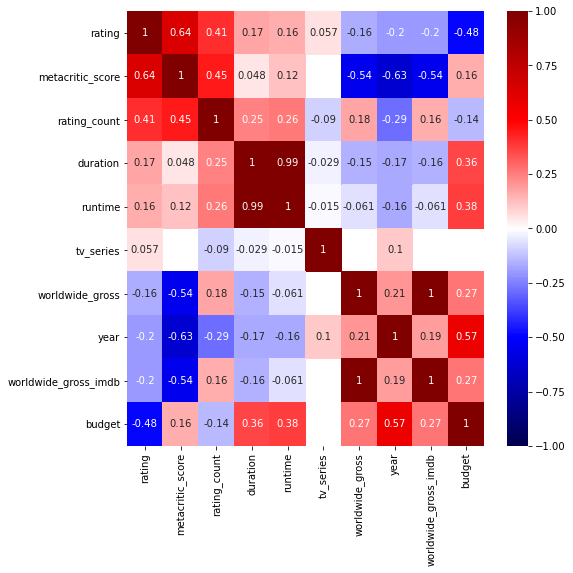

In [54]:
ix = films_df_reordered.iloc[:,:first_cast_column].corr().sort_values('rating', ascending=False).index
films_df_reordered_sorted = films_df_reordered.loc[:, ix]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(films_df_reordered_sorted.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, ax=ax);

In [55]:
#sns.heatmap(films_df_reordered.iloc[:,:first_cast_column].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

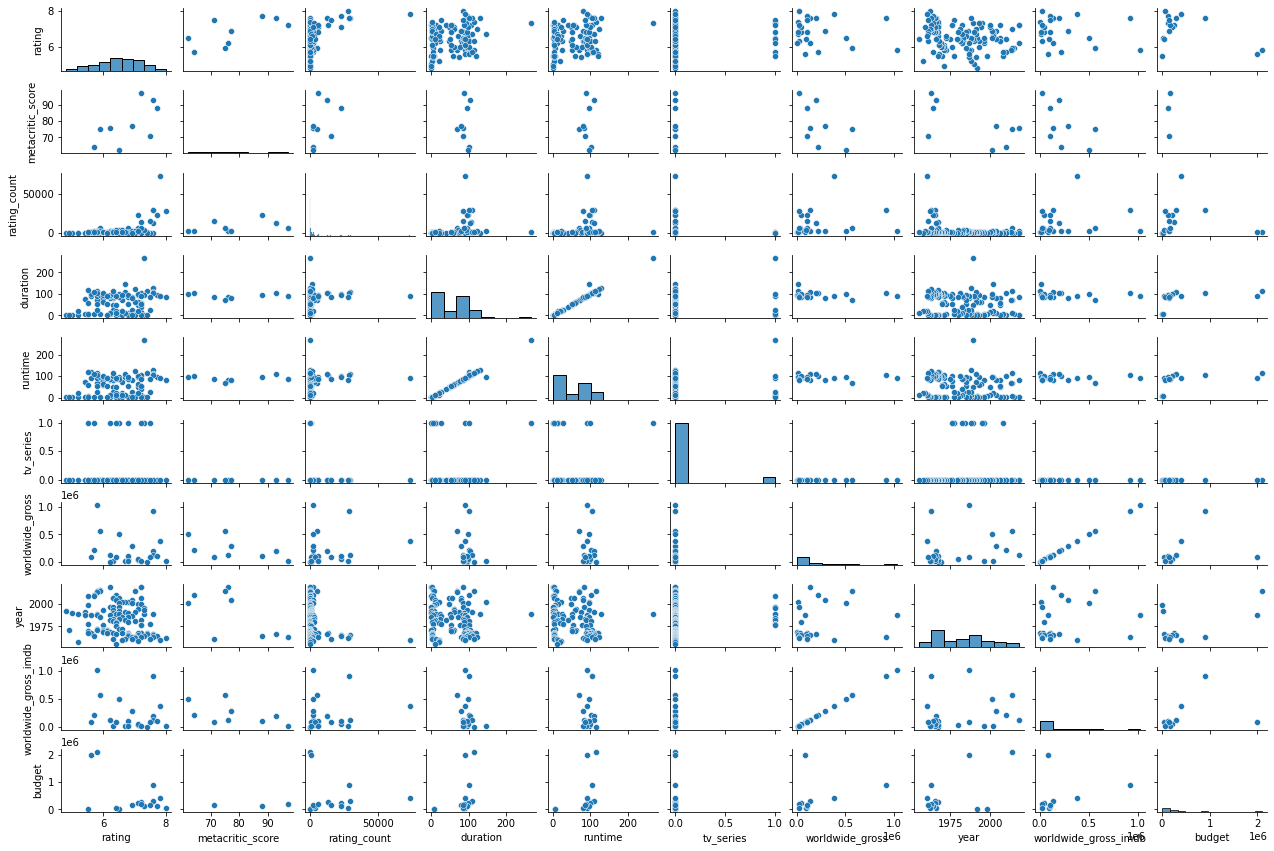

In [56]:
sns.pairplot(films_df_reordered_sorted.iloc[:,:first_cast_column], height=1.2, aspect=1.5);

#### Determine which columns have enough non-null values so they could be used

In [57]:
films_df_reordered['worldwide_gross'].value_counts(dropna=False)

NaN          103
47262.0        1
85018.0        1
222079.0       1
8132.0         1
132015.0       1
503548.0       1
104038.0       1
14378.0        1
380228.0       1
566423.0       1
15532.0        1
25000.0        1
200380.0       1
1028679.0      1
100665.0       1
47696.0        1
95209.0        1
106074.0       1
920144.0       1
134722.0       1
24296.0        1
36488.0        1
1149.0         1
24517.0        1
293681.0       1
Name: worldwide_gross, dtype: int64

In [58]:
films_to_analyze=films_df_reordered[(films_df_reordered['year'].notnull()) & (films_df_reordered['duration']>30) & (films_df_reordered['rating'].notnull()) & (films_df_reordered['cinematographer']!='') & (films_df_reordered['cinematographer'].notnull())]
films_to_analyze.iloc[:,5:15].head(10)


,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series,documentary,cinematographer
1,NaN,132015.0,132015.0,NaN,6.2,76.0,2314.0,0.0,0.0,Fabrice Aragno
4,2100000.0,NaN,NaN,NaN,5.8,NaN,319.0,0.0,0.0,Julian Atanassov
5,NaN,566423.0,566423.0,NaN,5.9,75.0,5487.0,0.0,0.0,Fabrice Aragno
7,NaN,NaN,NaN,NaN,5.8,NaN,313.0,0.0,0.0,Luís Branquinho
8,NaN,222079.0,222079.0,NaN,5.7,64.0,2539.0,0.0,0.0,Fabrice Aragno
17,NaN,293681.0,293681.0,NaN,6.9,77.0,2814.0,0.0,0.0,Julien Hirsch
19,NaN,14378.0,14378.0,NaN,6.7,NaN,1663.0,0.0,0.0,Ali Asad
22,NaN,503548.0,503548.0,NaN,6.5,62.0,2665.0,0.0,0.0,Julien Hirsch
28,NaN,25000.0,25000.0,NaN,6.3,NaN,934.0,0.0,0.0,Katell Djian
32,NaN,NaN,NaN,NaN,7.1,NaN,683.0,0.0,1.0,Christian Jacquenod


In [59]:
first_actor_column = (len(films_to_analyze.columns) - len(dict_of_all_actors))
first_actor_column

15

In [60]:
actor_columns = films_to_analyze.iloc[:, first_actor_column:].columns
actor_columns

Index(['Jean-Luc Godard', 'Anna Karina', 'Anne-Marie Miéville',
       'Anne Wiazemsky', 'Jean-Pierre Léaud', 'László Szabó',
       'Jean-Claude Brialy', 'Jean-Paul Belmondo', 'André S. Labarthe',
       'Juliet Berto',
       ...
       'Kim Kashkashian', 'Anton Mossine', 'Heinz Przbylski', 'Kerstin Boos',
       'H.J. Jurgen', 'Uwe Grzechowski', 'Jochen Gliscinsky', 'Iva Svarcová',
       'Elfi Gäbel', 'Carmen Mirando'],
      dtype='object', length=731)

In [61]:
films_to_analyze[actor_columns].sum()

Jean-Luc Godard        12.0
Anna Karina             7.0
Anne-Marie Miéville     3.0
Anne Wiazemsky          6.0
Jean-Pierre Léaud       5.0
                       ... 
Uwe Grzechowski         1.0
Jochen Gliscinsky       1.0
Iva Svarcová            1.0
Elfi Gäbel              1.0
Carmen Mirando          0.0
Length: 731, dtype: float64

In [62]:
actors_num_of_appearances = films_to_analyze[actor_columns].sum()
actors_num_of_appearances

Jean-Luc Godard        12.0
Anna Karina             7.0
Anne-Marie Miéville     3.0
Anne Wiazemsky          6.0
Jean-Pierre Léaud       5.0
                       ... 
Uwe Grzechowski         1.0
Jochen Gliscinsky       1.0
Iva Svarcová            1.0
Elfi Gäbel              1.0
Carmen Mirando          0.0
Length: 731, dtype: float64

In [63]:
appearances_threshold = 3
prevalent_actors_mask = (actors_num_of_appearances >= appearances_threshold)
prevalent_actors_mask

Jean-Luc Godard         True
Anna Karina             True
Anne-Marie Miéville     True
Anne Wiazemsky          True
Jean-Pierre Léaud       True
                       ...  
Uwe Grzechowski        False
Jochen Gliscinsky      False
Iva Svarcová           False
Elfi Gäbel             False
Carmen Mirando         False
Length: 731, dtype: bool

In [64]:
prevalent_actor_columns = actor_columns[prevalent_actors_mask]
prevalent_actor_columns 

Index(['Jean-Luc Godard', 'Anna Karina', 'Anne-Marie Miéville',
       'Anne Wiazemsky', 'Jean-Pierre Léaud', 'László Szabó',
       'Jean-Claude Brialy', 'Jean-Paul Belmondo', 'André S. Labarthe',
       'Juliet Berto', 'Myriem Roussel', 'Jean-Pierre Cassel',
       'Georges Staquet', 'Claude Brasseur'],
      dtype='object')

In [65]:
films_filename = 'films_to_analyze_'+ director + '.pickle'
with open(dir_str + films_filename, 'wb') as to_write:
    pickle.dump(films_to_analyze, to_write)

In [66]:
prevalent_actors_filename = 'prevalent_actors_' + director + '.pickle'
with open(dir_str + prevalent_actors_filename, 'wb') as to_write:
    pickle.dump(prevalent_actor_columns, to_write)

In [67]:
films_to_analyze.iloc[:, 4:18].head()

,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series,documentary,cinematographer,Jean-Luc Godard,Anna Karina,Anne-Marie Miéville
1,84.0,NaN,132015.0,132015.0,NaN,6.2,76.0,2314.0,0.0,0.0,Fabrice Aragno,1.0,0.0,1.0
4,114.0,2100000.0,NaN,NaN,NaN,5.8,NaN,319.0,0.0,0.0,Julian Atanassov,0.0,0.0,0.0
5,70.0,NaN,566423.0,566423.0,NaN,5.9,75.0,5487.0,0.0,0.0,Fabrice Aragno,0.0,0.0,0.0
7,70.0,NaN,NaN,NaN,NaN,5.8,NaN,313.0,0.0,0.0,Luís Branquinho,0.0,0.0,0.0
8,102.0,NaN,222079.0,222079.0,NaN,5.7,64.0,2539.0,0.0,0.0,Fabrice Aragno,0.0,0.0,0.0


### EDA and Linear Regression continued in `3a_eda_lin_reg_film_director.ipynb`